# Items

This notebook contains examples of using the ArcGIS API for Python to manage items in an ArcGIS Online portal. 

Each cell in this notebook is independent of every other cell, but each cell assumes the existence of a portal connection object stored in a variable named `gis`. The creation of this object is covered in the [Portal connection notebook](https://github.com/travisormsby/agol_admin/blob/main/portal_connection.ipynb).

Usernames used throughout this notebook are specific to my organization. You will need to change them to something appropriate for your organization.

All API references in this notebook are from the [arcgis.gis](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html) module: [ContentManager](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#contentmanager), [GIS](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#gis), and [Item](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#item)

* [Create `Item` objects](#create-item-obj)
    * [Get a specific item](#get-item)
    * [Search for items](#query)
        * [Default query](#default-query)
        * [Query a specific field](#query-a-specific-field)
        * [Query multi-word phrases](#query-multi-word-phrases)
        * [Query by range of values](#query-by-range-of-values)
        * [Combine query terms](#combining-query-terms)
    * [Advanced search](#advanced-search)
* [Get information about an item](#get-info)
    * [Display item information](#display-item-information)
    * [Access item properties](#access-item-properties)
* [Manage items](#manage)
    * [Create an item](#create-an-item)
    * [Copy an item](#copy-an-item)
    * [Share an item](#share-an-item)
        * [Default behavior of the `share` method](#default-behavior-of-the-share-method)
        * [Sharing items to groups: as documented](#sharing-items-to-groups-as-documented)
        * [Sharing items to groups: the undocumented reality](#sharing-items-to-groups-the-undocumented-reality)
    * [Update an item's information](#update-an-items-information)
    * [Bulk update multiple items' information](#bulk-update-multiple-items-information)
    * [Reassign an item to a new owner](#reassign-an-item-to-a-new-owner)
    * [Move an item between folders](#move-an-item-between-folders)
    * [Export an item](#export-an-item)
    * [Delete an item](#delete-an-item)

## Create `Item` objects

In order to manage items, you will need to represent them as some data structure that Python can manipulate. An instance of the [`ContentManager` class](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#contentmanager) can create these `Item` objects. This instance is available as the `content` property of a [`GIS` object](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#gis)

### Get a specific item

<a id='get-item'></a> The code below uses the [`get` method of the `ContentManager` object](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.ContentManager.get) to return a single `Item` object that matches the provided item id. 

In [433]:
item = gis.content.get("63d41db9006647afb92516cee5c89a1a")
print(item)

<Item title:"HOLC" type:Web Map owner:t.ormsby>


### Search for items

The [`search` method of the `ContentManager` object](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.ContentManager.search) returns a list of `Item` objects that match the search criteria. There are several parameters for the `search` method, most of which are well explained in the documentation. 

The most important parameter is `query`, which is used to search for items by fields not covered by the other parameters. The `query` parameter is also used for complex search logic using ranges, boolean operators, and grouping.

The use of the `query` parameter is unfortunately not well documented. Esri provides [examples of POST requests](https://developers.arcgis.com/rest/users-groups-and-items/search-reference.htm) made against the REST API directly, but these do not translate perfectly to the Python syntax of the `search` method. The examples below show how to correctly format query strings.

#### Default query

By default, the `query` argument is matched against items' title, tags, snippet, description, type, and typekeywords fields. The `query` argument is not case sensitive and will return close matches, not just exact matches. 

The code below will return up to 20 items that match the term `"holc"` in any of the default fields.

In [442]:
items = gis.content.search(query="holc", max_items=20)
for item in items:
    print(item)

<Item title:"HOLC Travis Ormsby" type:Web Mapping Application owner:t.ormsby>
<Item title:"HOLC" type:Web Map owner:t.ormsby>
<Item title:"Highest income" type:Feature Layer Collection owner:t.ormsby>
<Item title:"HOLC Appraisals" type:Feature Layer Collection owner:t.ormsby>
<Item title:"Lowest income" type:Feature Layer Collection owner:t.ormsby>
<Item title:"HOLC_Blocks" type:Service Definition owner:t.ormsby>
<Item title:"HOLC_Blocks" type:Feature Layer Collection owner:t.ormsby>
<Item title:"HOLC Travis Ormsby" type:Web Map owner:t.ormsby>
<Item title:"Highest percent white population" type:Feature Layer Collection owner:t.ormsby>
<Item title:"Highest percent population of color" type:Feature Layer Collection owner:t.ormsby>


#### Query a specific field

You can specify a particular field in the query, instead of using the default fields. Querying does not work on all fields, but you can specify the following:

* `id` (item ID)
* `owner` (owner username)
* `created` (Unix miliseconds timestamp)
* `modified` (Unix miliseconds timestamp)
* `lastviewed` (Unix miliseconds timestamp)
* `title`
* `type` ([tables of all types](https://developers.arcgis.com/rest/users-groups-and-items/items-and-item-types.htm))
* `typekeywords` ([tables of all type keywords](https://developers.arcgis.com/rest/users-groups-and-items/items-and-item-types.htm))
* `description`
* `tags`
* `snippet` (summary text)
* `accessInformation`
* `access` (public, private, org, or shared)
* `group` (group ID)
* `numviews` (number of views)
* `numratings` (number of ratings)
* `numcomments` (number of comments)
* `avgrating` (average rating)
* `culture` (locale information, e.g. "en-US")
* `orgid` (returns items within a specified organization)
* `categories`
* `contentStatus` (null, deprecated, org_authoritative, public_authoritative)
* `name` (does not work for finding notebooks)
* `protected` (True or False)


The code below narrows the search above by limiting the search to the snippet field.





In [443]:
items = gis.content.search(query="snippet:holc", max_items=20)
for item in items:
    print(item)

<Item title:"HOLC Appraisals" type:Feature Layer Collection owner:t.ormsby>
<Item title:"HOLC_Blocks" type:Service Definition owner:t.ormsby>
<Item title:"HOLC_Blocks" type:Feature Layer Collection owner:t.ormsby>


#### Query multi-word phrases

Querying items that match a multi-word phrase can be tricky. The code below is a naïve implementation of a search for the "HOLC Appraisals" item listed above. This implementation returns additional results that do not match the desired phrase

In [444]:
items = gis.content.search(query="title:HOLC Appraisals", max_items=20)
for item in items:
    print(item)

<Item title:"HOLC Appraisals" type:Feature Layer Collection owner:t.ormsby>
<Item title:"HOLC_Blocks" type:Service Definition owner:t.ormsby>
<Item title:"HOLC_Blocks" type:Feature Layer Collection owner:t.ormsby>


The code below uses single quotes in an attempt to represent a phrase. This also does not work.

In [445]:
items = gis.content.search(query="title:'HOLC Appraisals'", max_items=20)
for item in items:
    print(item)

<Item title:"HOLC Appraisals" type:Feature Layer Collection owner:t.ormsby>
<Item title:"HOLC_Blocks" type:Service Definition owner:t.ormsby>
<Item title:"HOLC_Blocks" type:Feature Layer Collection owner:t.ormsby>


To find content that matches the entire phrase, the phrase must be enclosed in double quotes. The code below uses double quotes around the search phrase and returns the correct result.

In [446]:
items = gis.content.search(query='title:"HOLC Appraisals"', max_items=20)
for item in items:
    print(item)

<Item title:"HOLC Appraisals" type:Feature Layer Collection owner:t.ormsby>


#### Query by range of values

 Values can be queried by range using `firstValue TO lastValue` (`TO` must be capitalized). Brackets (`[]`) around the range indicate that the search should be inclusive of the values. Curly braces (`{}`) indicate that the search should be exclusive of the values.

This is especially useful for numeric values, but can work for any field.

The code below searches for items created during the month of October in US Central Time. The range opens with a bracket because it must be inclusive of the first milisecond of October. It closes with a curly brace because it must be exclusive of the first milisecond of November.


In [447]:
items = gis.content.search(query="created:[1696136400000 TO 1698814800000}", max_items=20)
for item in items:
    print(item)

<Item title:"ProblemsSummary" type:Feature Layer Collection owner:t.ormsby>
<Item title:"ProblemsHeatMap" type:Feature Layer Collection owner:t.ormsby>
<Item title:"Collaboration" type:Notebook owner:t.ormsby>
<Item title:"Schools20MinWalk" type:Feature Layer Collection owner:t.ormsby>
<Item title:"ProblemsVectorTilePackage" type:Vector Tile Package owner:t.ormsby>
<Item title:"ProblemsClusters" type:Service Definition owner:t.ormsby>
<Item title:"ProblemsHeatMap" type:Service Definition owner:t.ormsby>
<Item title:"SchoolsInfoFeatures" type:Feature Layer Collection owner:t.ormsby>
<Item title:"ProblemsBins" type:Service Definition owner:t.ormsby>
<Item title:"ProblemsBins" type:Feature Layer Collection owner:t.ormsby>
<Item title:"SchoolsInfoBuffer" type:Feature Layer Collection owner:t.ormsby>
<Item title:"ProblemsVectorTilePackage" type:Vector Tile Layer owner:t.ormsby>
<Item title:"ProblemsSummary" type:Service Definition owner:t.ormsby>
<Item title:"ProblemsClusters" type:Feature 

#### Combining query terms

[Esri documentation](https://developers.arcgis.com/rest/users-groups-and-items/search-reference.htm) claims that you can use the Boolean operators `AND`, `OR` and `NOT` to combine terms in the query string. In practice, these Boolean operators do not work, likely due to a bug in the ArcGIS API for Python. 

For that reason, the code below uses sets and set methods to return collections of items that match more complex patterns needing Boolean operators.



In [479]:
# Dictionary of two sets of Item objects, each set returned from a different query
itemsets = {
    "query 1": set(gis.content.search(query='"highest percent"', max_items=100)),
    "query 2": set(gis.content.search(query='"example"', max_items=100))
}

query1 = itemsets["query 1"]
query2 = itemsets["query 2"]

# Add more sets to the dictionary representing the intersection, union, and difference of the original sets
itemsets["query1 AND query2"] = query1.intersection(query2) # AND means the intersection of two sets
itemsets["query1 OR query 2"] = query1.union(query2) # OR means the union of two sets
itemsets["query1 NOT query 2"] = query1.difference(query2) # NOT means the difference of two sets

# Output the items in each set
for setname, itemset in itemsets.items():
    print(f"{setname} returns:")
    for item in itemset:
        print(item)
    

query 1 returns:
<Item title:"Highest percent population of color" type:Feature Layer Collection owner:t.ormsby>
<Item title:"ExampleMap1" type:Web Map owner:ormsby_guest1>
<Item title:"Highest percent white population" type:Feature Layer Collection owner:t.ormsby>
query 2 returns:
<Item title:"ExampleMap2" type:Web Map owner:ormsby_guest1>
<Item title:"ExampleMap1" type:Web Map owner:ormsby_guest1>
<Item title:"ExampleMap3" type:Web Map owner:ormsby_guest1>
query1 AND query2 returns:
<Item title:"ExampleMap1" type:Web Map owner:ormsby_guest1>
query1 OR query 2 returns:
<Item title:"ExampleMap1" type:Web Map owner:ormsby_guest1>
<Item title:"ExampleMap2" type:Web Map owner:ormsby_guest1>
<Item title:"Highest percent white population" type:Feature Layer Collection owner:t.ormsby>
<Item title:"ExampleMap3" type:Web Map owner:ormsby_guest1>
<Item title:"Highest percent population of color" type:Feature Layer Collection owner:t.ormsby>
query1 NOT query 2 returns:
<Item title:"Highest perce

Putting the sets of `Item` objects in a dictionary as above is done to show you the relationships betwen the different sets. In practice, you would not usually do that. The code below represents a more typical pattern by creating variables to hold the results of the initial query terms, and then performing the set operation on those results

In [478]:
query1 = set(gis.content.search(query='"highest percent"', max_items=100))
query2 = set(gis.content.search(query='"example"', max_items=100))
query1OR2 = query1.union(query2)
for item in query1OR2:
    print(item)

<Item title:"ExampleMap1" type:Web Map owner:ormsby_guest1>
<Item title:"ExampleMap2" type:Web Map owner:ormsby_guest1>
<Item title:"Highest percent white population" type:Feature Layer Collection owner:t.ormsby>
<Item title:"ExampleMap3" type:Web Map owner:ormsby_guest1>
<Item title:"Highest percent population of color" type:Feature Layer Collection owner:t.ormsby>


### Advanced search

The [`advanced_search` method of the `ContentManager` object](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.ContentManager.advanced_search) is very similar to the `search` method, with three important differences.

* The `advanced_search` method exposes some additional parameters to refine your search. These additional parameters are well documented in the API referenve.

* The `search` method defaults to searching only inside the organization, but can search outside. The `advanced_search` method does not have a parameter to search inside the organization only (though similar results could be achieved with a query string)

* The `search` method returns a list of `Item` objects. By default, the `advanced_search` method retuns a dictionary with a list of `Item` objects stored in the `results` key. Optionally, `advanced_search` will store a list of dictionaries of item properties in the `results` key.



In [482]:
# The search method looks only inside the organization by default 
# It returns a list of Item objects
gis.content.search(query="snippet:holc")

[<Item title:"HOLC Appraisals" type:Feature Layer Collection owner:t.ormsby>,
 <Item title:"HOLC_Blocks" type:Service Definition owner:t.ormsby>,
 <Item title:"HOLC_Blocks" type:Feature Layer Collection owner:t.ormsby>]

In [490]:
# The advanced_search method searches all of ArcGIS Online 
# It returns a dictionary with Item objects stored in the results key
gis.content.advanced_search(query="snippet:holc")

{'total': 761,
 'start': 1,
 'num': 100,
 'nextStart': 101,
 'results': [<Item title:" (HOLC) Neighborhood Redlining Grade Boston" type:Web Map owner:raechelw>,
  <Item title:"“Redlining” and Exposure to Urban Heat Islands" type:Web Map owner:ElainnaH>,
  <Item title:"“Redlining” and Exposure to Urban Heat Islands" type:Web Map owner:jpszitta_DurhamEM>,
  <Item title:"“Redlining” and Exposure to Urban Heat Islands" type:Web Map owner:dpisut_content>,
  <Item title:"“Redlining” and Exposure to Urban Heat Islands" type:Web Map owner:Sarah_A_Knight>,
  <Item title:"“Redlining” and Exposure to Urban Heat Islands" type:Web Map owner:Connected_DMV_Atlas>,
  <Item title:"“Redlining” and Exposure to Urban Heat Islands – Dallas" type:Web Mapping Application owner:ldl8244>,
  <Item title:"“Redlining” and Exposure to Urban Heat Islands-Copy" type:Web Map owner:jeremyhoffman>,
  <Item title:"“Redlining” and Exposure to Urban Heat Islands-Copy" type:Web Map owner:noir0315_gisucla>,
  <Item title:"“

## Get information about an item

Once you have an `Item` object, you can access information about that item.

### Display item information

The code below uses the Jupyter Notebook `display` function to show a card for an item, including a link to its item details page.


<Item title:"ExampleMap3" type:Web Map owner:ormsby_guest1>
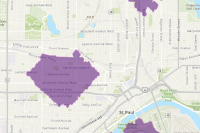

In [491]:
item = gis.content.get("86f92739855e481c82d54c6dc167ef99")
display(item)

### Access item properties

You can also access specific properties of an `Item` object. The code below prints some example information you can access. The [REST API documentation for items](https://developers.arcgis.com/rest/users-groups-and-items/item.htm) has the complete list of available properties.

In [677]:
item = gis.content.get("86f92739855e481c82d54c6dc167ef99")
print(item.shared_with)
print(item.can_delete)
print(item.owner)
print(item.modified)

{'everyone': True, 'org': True, 'groups': []}
True
t.ormsby
1697984440000


## Manage items

### Create an item


### Copy an item


### Update an item's information


### Bulk update multiple items' information


### Reassign an item to a new owner


### Share an item


To change the sharing of an item, you need to use the `Item` object's [share](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.Item.share) and [unshare](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.Item.unshare) methods.

#### Default behavior of the `share` method

 Be aware that the default parameter values represent the most restrictive public and organization sharing options. The code below specifies that the item above should not be shared with everyone, but does not specify how it should be shared with the organization. The default parameter values mean that the item will be unshared from the organization as well.

In [678]:
item = gis.content.get("86f92739855e481c82d54c6dc167ef99")
print(item.shared_with)

item.share(everyone=False)
print(item.shared_with)

{'everyone': True, 'org': True, 'groups': []}
{'everyone': False, 'org': False, 'groups': []}


For that reason, the code below specifies a value for both the `everyone` and `org` parameters, which is a best practice when using the `share` method.

In [635]:
item = gis.content.get("86f92739855e481c82d54c6dc167ef99")
item.share(everyone=False, org=True)
print(item.shared_with)

{'everyone': False, 'org': True, 'groups': []}


#### Sharing items to groups: as documented

The code below passes a list of [`Group` objects](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#group) created by the [`get` method of the `GroupManager` object](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.GroupManager.get) to the `groups` parameter of the `share` method. This shares the item with those groups.

The `share` method returns a dictionary indicating any groups the item could not be shared with. In this case, the item could be shared with both groups, so the `notSharedWith` value is an empty list, and the two groups are indicated in the `groups` value in the separate dictionary returned by the item's `shared_with` property.

In [679]:
item = gis.content.get("86f92739855e481c82d54c6dc167ef99")
group1 = gis.groups.get("435bfd95c37b404ebbf9308b38dcd251")
group2 = gis.groups.get("d34a7555514b4a58a6a0f4c9c0ce4078")

share_result = item.share(
    everyone=False, 
    org=True, 
    groups=[group1, group2]
)

print(share_result)
print(item.shared_with)

{'notSharedWith': [], 'itemId': '86f92739855e481c82d54c6dc167ef99'}
{'everyone': False, 'org': True, 'groups': [<Group title:"Group1" owner:t.ormsby>, <Group title:"Group2" owner:t.ormsby>]}


The code below uses the [`unshare` method of the `Item` object](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.Item.unshare) to remove the item from one of the groups it is shared with. 

In [680]:
item = gis.content.get("86f92739855e481c82d54c6dc167ef99")
group2 = gis.groups.get("d34a7555514b4a58a6a0f4c9c0ce4078")

item.unshare(groups=[group2])

print(item.shared_with)

{'everyone': False, 'org': True, 'groups': [<Group title:"Group1" owner:t.ormsby>]}


#### Sharing items to groups: the undocumented reality

There are several complexities for sharing with groups that are not immediately obvious. The next several examples walk through pitfalls you might encounter when sharing with a group. None of these behaviors are documented in the API reference, though some of them are documented in the [REST API for the shareitems endpoint](https://developers.arcgis.com/rest/users-groups-and-items/share-items.htm). 

The code below is identical to the first group sharing code above. But the return value of the `share` method now seems to suggest the item was not shared with the first group. That's not true, as the `shared_with` property confirms. The confusing `notSharedWith` value occured because in this example, the item was already shared with this group. 

The best way to interpret the `notSharedWith` value is "the sharing was not changed to add these groups to the existing groups the item is already shared with". This value does not mean "this item is not shared with these groups".

For this reason, it is not a good idea to rely on the length of the `notSharedWith` list to determine if sharing was successful or not.

In [681]:
item = gis.content.get("86f92739855e481c82d54c6dc167ef99")
group1 = gis.groups.get("435bfd95c37b404ebbf9308b38dcd251")
group2 = gis.groups.get("d34a7555514b4a58a6a0f4c9c0ce4078")

share_result = item.share(
    everyone=False, 
    org=True, 
    groups=[group1, group2]
)

print(share_result)
print(item.shared_with)

{'notSharedWith': ['435bfd95c37b404ebbf9308b38dcd251'], 'itemId': '86f92739855e481c82d54c6dc167ef99'}
{'everyone': False, 'org': True, 'groups': [<Group title:"Group1" owner:t.ormsby>, <Group title:"Group2" owner:t.ormsby>]}


The code below is similar to the code above, except that it passes a list of group id strings to the `groups` parameter instead of a list of `Group` objects. The result is similar, except the `notSharedWith` list now includes a additional empty string. This superflous empty string appears in this list whenever you pass a list of group id strings to the `groups` parameter. For that reason, it is a best practice to use `Group` objects instead

In [682]:
item = gis.content.get("86f92739855e481c82d54c6dc167ef99")

share_result = item.share(
    everyone=False, 
    org=True, 
    groups=["435bfd95c37b404ebbf9308b38dcd251", "d34a7555514b4a58a6a0f4c9c0ce4078"]
)

print(share_result)
print(item.shared_with)

{'notSharedWith': ['', '435bfd95c37b404ebbf9308b38dcd251', 'd34a7555514b4a58a6a0f4c9c0ce4078'], 'itemId': '86f92739855e481c82d54c6dc167ef99'}
{'everyone': False, 'org': True, 'groups': [<Group title:"Group1" owner:t.ormsby>, <Group title:"Group2" owner:t.ormsby>]}


The code below attempts to share a different item, with a different owner, to the same two groups. This item's owner is a member of both groups, but is only allowed to contribute content to the first group. The `share` method returns a response indicating that the content was not shared to the second group. The `shared_with` property confirms that the item is shared only with the first group.


In [684]:
item = gis.content.get("c01140f5fb4b492eb1e9b3c9d69bead7")
group1 = gis.groups.get("435bfd95c37b404ebbf9308b38dcd251")
group2 = gis.groups.get("d34a7555514b4a58a6a0f4c9c0ce4078")

share_result = item.share(
    everyone=False, 
    org=True, 
    groups=[group1, group2]
)
print(share_result)
print(item.shared_with)

{'notSharedWith': ['d34a7555514b4a58a6a0f4c9c0ce4078'], 'itemId': 'c01140f5fb4b492eb1e9b3c9d69bead7'}
{'everyone': False, 'org': True, 'groups': [<Group title:"Group1" owner:t.ormsby>]}


The code below attempts to share the same item as above to a shared update group. The item owner is a member of this group and has permission to contribute content to the group, but the item is not successfully shared.

In [685]:
item = gis.content.get("c01140f5fb4b492eb1e9b3c9d69bead7")
sharedUpdateGroup = gis.groups.get("65959444535f4bbb84dbb740a1fc4f37")
share_result = item.share(
    everyone=False, 
    org=True, 
    groups=[sharedUpdateGroup]
)
print(share_result)
print(item.shared_with)

{'notSharedWith': ['65959444535f4bbb84dbb740a1fc4f37'], 'itemId': 'c01140f5fb4b492eb1e9b3c9d69bead7'}
{'everyone': False, 'org': True, 'groups': [<Group title:"Group1" owner:t.ormsby>]}


When sharing to a shared update group, you must explicitly enable group members to edit the item. The code below sets the `allow_members_to_edit` parameter of the `share` method to `True`, allowing the item to be successfully shared.

In [686]:
item = gis.content.get("c01140f5fb4b492eb1e9b3c9d69bead7")
sharedUpdateGroup = gis.groups.get("65959444535f4bbb84dbb740a1fc4f37")
share_result = item.share(
    everyone=False, 
    org=True, 
    groups=[sharedUpdateGroup],
    allow_members_to_edit=True
)
print(share_result)
print(item.shared_with)

{'notSharedWith': [], 'itemId': 'c01140f5fb4b492eb1e9b3c9d69bead7'}
{'everyone': False, 'org': True, 'groups': [<Group title:"Group1" owner:t.ormsby>, <Group title:"Shared Update" owner:t.ormsby>]}


The code below shares the same item as above with a group that the item owner is not a member of. This code works because the item is shared to the organization and the user associated with the `gis` object is the owner of the group the item is being shared to. Group owners or managers can add organization-shared content to their group, even if the item owner is not a group member. 

Notice also that even though only a single group is specified in the `groups` parameter, the `shared_with` property indicates the item is shared with two gruops. Groups passed to the `groups` parameter are added to the groups the item is shared to, they do not replace those groups. There is no way to use the `share` method to unshare an item from a group.

In [687]:
item = gis.content.get("c01140f5fb4b492eb1e9b3c9d69bead7")
adminGroup = gis.groups.get("ecc2dd125703488d8d2c1d1bc2e14380")
share_result = item.share(
    everyone=False, 
    org=True, 
    groups=[adminGroup]
)
print(share_result)
print(item.shared_with)

{'notSharedWith': [], 'itemId': 'c01140f5fb4b492eb1e9b3c9d69bead7'}
{'everyone': False, 'org': True, 'groups': [<Group title:"Group1" owner:t.ormsby>, <Group title:"Shared Update" owner:t.ormsby>, <Group title:"AdminsOnly" owner:t.ormsby>]}


The code below changes the sharing of the item above so that it is not shared with the organization any longer. If performed in the portal web app, this operation would have automatically unshared the item from any groups the item owner cannot contribute content to and succesfully updated the organization sharing level.

But the Python API throws an error wrongly indicating the admin user associated with the `gis` object does not have permission to change sharing.

In [688]:
item = gis.content.get("c01140f5fb4b492eb1e9b3c9d69bead7")
share_result = item.share(
    everyone=False, 
    org=False
)
print(share_result)
print(item.shared_with)

Exception: User does not own the item or have the privileges to share this item.

The code below attempts to change the orgnization setting by using the `unshare` method to remove the item from the group the item owner does not have permission to contribute to, then changing the organization sharing level with the `share` method. This does not work either

In [689]:
item = gis.content.get("c01140f5fb4b492eb1e9b3c9d69bead7")
adminGroup = gis.groups.get("ecc2dd125703488d8d2c1d1bc2e14380")
item.unshare([adminGroup])

share_result = item.share(
    everyone=False, 
    org=False,
    groups=None
)
print(share_result)
print(item.shared_with)

Exception: User does not own the item or have the privileges to share this item.

For this reason, the code below temporarily reassigns ownership of the item in order to correctly change the organization sharing level.

In [690]:
item = gis.content.get("c01140f5fb4b492eb1e9b3c9d69bead7")
origOwner = item.owner
item.reassign_to(gis.users.me)

adminGroup = gis.groups.get("ecc2dd125703488d8d2c1d1bc2e14380")
item.unshare([adminGroup])

share_result = item.share(
    everyone=False, 
    org=False,
    groups=None
)

item.reassign_to(origOwner)

print(share_result)
print(item.shared_with)

{'notSharedWith': [], 'itemId': 'c01140f5fb4b492eb1e9b3c9d69bead7'}
{'everyone': False, 'org': False, 'groups': [<Group title:"Group1" owner:t.ormsby>, <Group title:"Shared Update" owner:t.ormsby>]}


### Move an item between folders


### Export an item


### Delete an item